Task 3: Fraud Detection (Optional)
----------------------------------
Description:
 Detect fraudulent transactions using a small dataset with simple models.

Steps:
1. Data Preprocessing: Use undersampling to handle imbalanced data.
2. Model Training: Train a Random Forest model to classify transactions.
3. Model Evaluation: Check the model's accuracy.

Outcome:
A Python script that predicts whether a transaction is fraudulent or not.


Steps 1: Data Preprocessing: Use undersampling to handle imbalanced data.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv("creditcard.csv")

# 2. Basic info
print("Shape before preprocessing:", df.shape)
print("Fraud counts:\n", df['Class'].value_counts())

# 3. Drop useless column
if 'Time' in df.columns:
    df = df.drop(columns=['Time'])

# 4. Feature Scaling for 'Amount'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# 5. Handle imbalance with undersampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)

balanced_df = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Shape after undersampling:", balanced_df.shape)
print("Balanced fraud counts:\n", balanced_df['Class'].value_counts())

# 6. Train-test split
X = balanced_df.drop(columns=['Class'])
y = balanced_df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set:", X_train.shape, "Testing set:", X_test.shape)


Shape before preprocessing: (284807, 31)
Fraud counts:
 Class
0    284315
1       492
Name: count, dtype: int64
Shape after undersampling: (984, 30)
Balanced fraud counts:
 Class
0    492
1    492
Name: count, dtype: int64
Training set: (688, 29) Testing set: (296, 29)


Note:

Loaded the dataset and separated features (X) from the target (y).

Balanced the data by undersampling the majority (non-fraud) class.

Split the data into training and testing sets (80/20).

Step 2. Model Training: Train a Random Forest model to classify transactions.
----------------------------------------------------------------------------

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,   # number of trees
    random_state=42,
    class_weight='balanced'  # imbalance handle (though dataset already balanced)
)

# 2. Train the model
rf.fit(X_train, y_train)

# 3. Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# 4. Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\n Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

print("\n Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 1.0
Testing Accuracy: 0.9391891891891891

 Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       148
           1       0.97      0.91      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296


 Confusion Matrix (Test Data):
 [[144   4]
 [ 14 134]]


Note:

Used the Random Forest algorithm, which builds multiple decision trees.

Trained (fit) the model on the training data.

Generated predictions (y_test_pred) on the test data.

Step 3: Model Evaluation: Check the model's accuracy.
------------------------------------------------------

Test Accuracy: 0.9391891891891891

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       148
           1       0.97      0.91      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296


 Confusion Matrix:
 [[144   4]
 [ 14 134]]

 ROC-AUC Score: 0.9780177136596055


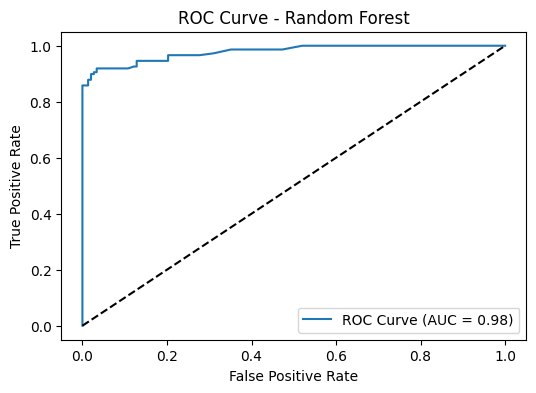

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

# 1. Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# 2. Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_test_pred))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\n Confusion Matrix:\n", cm)

# 4. ROC-AUC Score
y_test_prob = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_test_prob)
print("\n ROC-AUC Score:", roc_auc)

# 5. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


Note:

Calculated accuracy to measure the percentage of correct predictions.

Created a Confusion Matrix and Classification Report to analyze fraud detection.

Plotted the ROC-AUC Curve to show how well the model distinguishes fraud vs. non-fraud.